# **Análisis de reservas en un negocio de hoteles**

### **Proyecto final de Data Science II para CoderHouse**



### **Nicolás Isoler**

Una importante empresa de hoteles del país está revisando sus costos comerciales. Analizando los contratos detectan que poseen un acuerdo con la agencia de marketing que les ayuda a traer clientes potenciales al hotel.

Según lo acordado, se le paga un costo fijo mensual pequeño por el servicio, pero la mayoría es un costo variable atado a las reservas de USD 1,50 por cada reserva realizada. Se les paga contra resultado; es decir, si traen un cliente potencial que no hace una reserva, entonces no hay que pagarles el improte variable. Solo se les paga cuando esos clientes potenciales que traen realmente hacen una reserva en el hotel.

El problema surge cuando se dan cuenta que el costo variable debe ser abonado independientemente que la reserva sea cancelada o se haga efectiva la visita (ya que los clientes sólo pagan cuando llegan al hotel, no al momento de hacer su reserva).

Además, cuando alguien cancela con menos de 3 días de anticipación el costo es de alrededor de USD 120,00 adicionales.

# **Preguntas e hipótesis de interés**
-  ¿Cuánto es la tasa de cancelación de reservas?
-  ¿Cuáles son las reservas con mayor riesgo de cancelación?
-  Las reservas que se hacen con mayor anticipación tienen mucho riesgo de cancelarse.
-  Las reservas que incluyen hijos tienen menor riesgo.
-  Los usuarios que realizaron algún cambio en su reserva tienen menor riesgo.
-  Cuando el usuario ha realizado una solicitud especial el riesgo es menor.
-  Las reservas que tienen un “adr” bajo el riesgo es menor.



Columna"Tipo de Hotel" hace referencia a la clase de hotel consultado, Resort o Ciudad
Reserva cancelada se refiere a si el cliente canceló la reserva, admitiendo como respuesta "Sí" o "No"
Días transcurridos se refiere a los días transcurridos desde la reserva hasta la fecha de llegada al hotel
Mes de la fecha de llegada hace mención al mes de arribo al hotel
Número de semana del año de la fecha de llegada se refiere a la semana del año de la fecha de arribo
Número de noches de fin de semana (sábado o domingo) refiere a Sábados o Domingos que el huésped se alojó o reservó para quedarse en el hotel
Número de noches de la semana (de lunes a viernes) quiere decir las noches de Lunes a Viernes que el huésped se hospedó o reservó para quedarse en el hotel


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from   scipy import stats
import statsmodels.formula.api as sm
import os
import missingno as msno
!pip install scikit-learn
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib


In [ ]:
df= pd.read_excel('DatasetReservasHotel.xlsx')

In [ ]:
df

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,Niños,Bebés,Comida,País de origen,Segmento de mercado,Canal de distribución,Cliente habitual,Cancelación previa,Reservas previas no canceladas,Código del tipo de habitación,Código del tipo de habitación asignado,Número de cambios en la reserva,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva,Precio por noche,Precio total
0,Resort Hotel,No,342,2015,July,27,1,2,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,Sin depósito,0,0,Transient,0.00,0,0,Check-Out,210,420
1,Resort Hotel,No,737,2015,July,27,1,2,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,Sin depósito,0,0,Transient,0.00,0,0,Check-Out,210,420
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,Sin depósito,0,0,Transient,75.00,0,0,Check-Out,130,130
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No reembolsable,304,0,Transient,75.00,0,0,Check-Out,130,130
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online Agentes viajes,TA/Operadores turísticos,0,0,0,A,A,0,Reembolsable,240,0,Transient,98.00,0,1,Check-Out,210,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,No,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No reembolsable,394,0,Transient,96.14,0,0,Check-Out,210,1470
119386,City Hotel,No,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,Reembolsable,9,0,Transient,225.43,0,2,Check-Out,290,2030
119387,City Hotel,No,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,Reembolsable,9,0,Transient,157.71,0,4,Check-Out,210,1470
119388,City Hotel,No,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No reembolsable,89,0,Transient,104.40,0,0,Check-Out,210,1470


Veamos el encabezado del dataframe para ver cómo son las catacterísticas que incluye.

In [ ]:
df.head(0)

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,Niños,Bebés,Comida,País de origen,Segmento de mercado,Canal de distribución,Cliente habitual,Cancelación previa,Reservas previas no canceladas,Código del tipo de habitación,Código del tipo de habitación asignado,Número de cambios en la reserva,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva,Precio por noche,Precio total


### **Descripción de cada columna**

**Tipo de Hotel:** hace referencia a la clase de hotel consultado, Resort o Ciudad.

**Reserva cancelada:** se refiere a si el cliente canceló la reserva, admitiendo como respuesta "Sí" o "No".

**Días transcurridos:** se refiere a los días transcurridos desde la reserva hasta la fecha de llegada al hotel.

**Año de llegada:** se al año de arribo al hotel.

**Mes de llegada:** hace mención al mes de arribo al hotel.

**Número de semana del año de llegada:** se refiere a la semana del año de la fecha de arribo.

**Día de llegada:** hace mención al día de arribo al hotel.

**Número de noches de fin de semana:** refiere a Sábados o Domingos que el huésped se alojó o reservó para quedarse en el hotel.

**Número de noches de la semana:** quiere decir las noches de Lunes a Viernes que el huésped se hospedó o reservó para quedarse en el hotel.

**Adultos:** número de adultos de la visita.

**Niños:** número de niños de la visita.

**Bebés:** número de bebés de la visita.

**Comida:** tipo de comida reservada, Bed and Breakfast (BB), Half Board (HB), Full Board (FB), Undifined.

**País de origen:** país de residendia del cliente de la reserva.

**Segmento de mercado:** designación del segmento de mercado. El término "TA" : Agentes de viajes y "TO" : Operadores turísticos.

**Canal de distribución:** canal de distribución de reservas.

**Cliente habitual:** El nombre de la reserva era de un huésped repetido (1) / No era un huésped repetido (0)

**Cancelación previa:** número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.

**Reservas previas no canceladas:** número de reservas anteriores no canceladas por el cliente antes de la reserva actual.

**Código del tipo de habitación:** código del tipo de habitación reservada.

**Código del tipo de habitación asignado:** código del tipo de habitación asignado a la reserva.

**Número de cambios en la reserva:** número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva hasta la entrada.

**Tipo de garantía:** indicación de si el cliente hizo un depósito para garantizar la reserva. Sin depósito: no se realizó ningún depósito; No reembolsable: se realizó un depósito por el valor del coste total de la estancia; Reembolsable: se realizó un depósito por un valor inferior al coste total de la estancia.

**Importe de la reserva:** importe del depósito de garantía.

**ID de la entidad de reserva:** número de indentificación de la agencia de viajes que hizo la reserva.

**Tipo de reserva:** tipo de reserva, asumiendo una de las cuatro categorías: Contract - cuando la reserva tiene asociada una adjudicación u otro tipo de contrato; Group - cuando la reserva está asociada a un grupo; Transient - cuando la reserva no forma parte de un grupo o contrato, y no está asociada a otra reserva transitoria; Transient-party - cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria.

**Días antes de confirmar:** número de días que la reserva estuvo en la lista de espera antes de ser confirmada al cliente.

**Número de plazas de aparcamiento:** número de plazas de aparcamiento que necesita el cliente.

**Número de peticiones:** número de peticiones especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).

**Estado de la reserva:** estado de la última reserva, asumiendo una de las tres categorías: Canceled - la reserva fue cancelada por el cliente; Check-Out - el cliente se ha registrado pero ya se ha marchado; No-Show - el cliente no se ha registrado y ha informado al hotel del motivo.

## **DATA WRANGLING**

Para comenzar el análisis de los datos vamos a ver la estructura del dataset de manera de entender la cantidad de datos, la clase de variables con las que vamos a trabajar, la existencia de valores nulos o duplicados.

In [ ]:
df.shape

(119390, 32)

El dataset obtenido posee 119.390 filas y 30 columnas.

In [ ]:
df.dtypes

,0
Tipo de Hotel,object
Reserva cancelada,object
Días transcurridos,int64
Año de llegada,int64
Mes de llegada,object
Número de semana del año de llegada,int64
Día de llegada,int64
Número de noches de fin de semana,int64
Número de noches de la semana,int64
Adultos,int64


In [ ]:
df.describe()

,Días transcurridos,Año de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,Niños,Bebés,Cliente habitual,Cancelación previa,Reservas previas no canceladas,Número de cambios en la reserva,Importe de la reserva,ID de la entidad de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Precio por noche,Precio total
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.933143,2.513410,1.862660,0.105143,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363,203.337968,721.697965
std,106.863097,0.707476,13.605138,8.780829,0.999000,1.904658,0.586224,0.400930,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798,56.882018,616.715513
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,80.000000,80.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000,160.000000,390.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000,210.000000,630.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,210.000000,840.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,4470.000000,27360.000000


In [ ]:
# Se toma conocimiento de las columnas
df.columns

Index(['Tipo de Hotel', 'Reserva cancelada', 'Días transcurridos',
       'Año de llegada', 'Mes de llegada',
       'Número de semana del año de llegada', 'Día de llegada',
       'Número de noches de fin de semana', 'Número de noches de la semana',
       'Adultos', 'Niños', 'Bebés', 'Comida', 'País de origen',
       'Segmento de mercado', 'Canal de distribución', 'Cliente habitual',
       'Cancelación previa', 'Reservas previas no canceladas',
       'Código del tipo de habitación',
       'Código del tipo de habitación asignado',
       'Número de cambios en la reserva', 'Tipo de garantía',
       'Importe de la reserva', 'ID de la entidad de reserva',
       'Tipo de reserva', 'Días antes de confirmar',
       'Número de plazas de aparcamiento', 'Número de peticiones',
       'Estado de la reserva', 'Precio por noche', 'Precio total'],
      dtype='object')

Analizamos el dataframe para ver si existen datos erróneos o nulos. Miramos la información general del dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Tipo de Hotel                           119390 non-null  object 
 1   Reserva cancelada                       119390 non-null  object 
 2   Días transcurridos                      119390 non-null  int64  
 3   Año de llegada                          119390 non-null  int64  
 4   Mes de llegada                          119390 non-null  object 
 5   Número de semana del año de llegada     119390 non-null  int64  
 6   Día de llegada                          119390 non-null  int64  
 7   Número de noches de fin de semana       119390 non-null  int64  
 8   Número de noches de la semana           119390 non-null  int64  
 9   Adultos                                 119390 non-null  int64  
 10  Niños                                   1193

Podemos ver que los datos vienen limpios, sin valores nulos. Vemos que hay variables enteras y otras tipo texto (str) que corresponden a categorías.

In [ ]:
df.isnull().sum()

,0
Tipo de Hotel,0
Reserva cancelada,0
Días transcurridos,0
Año de llegada,0
Mes de llegada,0
Número de semana del año de llegada,0
Día de llegada,0
Número de noches de fin de semana,0
Número de noches de la semana,0
Adultos,0


El dataset no posee datos nulos, posee doce variables categóricas y dieciocho numéricas.

Analizamos la existencia de duplicados.

In [ ]:
df.duplicated().value_counts()

,count
False,91896
True,27494


In [ ]:
dfn = df.drop_duplicates().reset_index(drop=True)
dfn.head(5)

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,...,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva,Precio por noche,Precio total
0,Resort Hotel,No,342,2015,July,27,1,2,0,2,...,Sin depósito,0,0,Transient,0.0,0,0,Check-Out,210,420
1,Resort Hotel,No,737,2015,July,27,1,2,0,2,...,Sin depósito,0,0,Transient,0.0,0,0,Check-Out,210,420
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,Sin depósito,0,0,Transient,75.0,0,0,Check-Out,130,130
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,No reembolsable,304,0,Transient,75.0,0,0,Check-Out,130,130
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,Reembolsable,240,0,Transient,98.0,0,1,Check-Out,210,420


Verificamos la eliminación de los valores duplicados.

In [ ]:
dfn.duplicated().value_counts()

,count
False,91896


Realizamos un primer análisis de las variables para ver la cantidad de categorías que poseen.

In [ ]:
dfn["Tipo de Hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
dfn["Reserva cancelada"].unique()

array(['No', 'Si'], dtype=object)

In [ ]:
dfn["Días transcurridos"].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [ ]:
dfn["Año de llegada"].unique()

array([2015, 2016, 2017])

In [ ]:
dfn["Mes de llegada"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
dfn["Número de semana del año de llegada"].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [ ]:
dfn["Día de llegada"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
dfn["Número de noches de fin de semana"].unique()

array([ 2,  0,  1,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [ ]:
dfn["Número de noches de la semana"].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [ ]:
dfn["Adultos"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55, 20,  6,  5, 10,  0])

In [ ]:
dfn["Niños"].unique()

array([ 0,  1,  2, 10,  3,  5,  4])

In [ ]:
dfn["Bebés"].unique()

array([ 0,  1,  2, 10,  9])

In [ ]:
dfn["Comida"].unique()

array(['BB', 'FB', 'HB', 'Undefined'], dtype=object)

In [ ]:
dfn["País de origen"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ARG', 'ROU', 'NOR',
       'OMN', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [ ]:
dfn["Segmento de mercado"].unique()

array(['Direct', 'Corporate', 'Online Agentes viajes', 'Online TA',
       'Offline TA/Operadores', 'Offline TA/TO', 'Complementary',
       'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
dfn["Canal de distribución"].unique()

array(['Direct', 'Corporate', 'TA/Operadores turísticos', 'TA/TO',
       'Undefined', 'GDS'], dtype=object)

In [ ]:
dfn["Cliente habitual"].unique()

array([0, 1])

In [ ]:
dfn["Cancelación previa"].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [ ]:
dfn["Reservas previas no canceladas"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [ ]:
dfn["Código del tipo de habitación"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
dfn["Código del tipo de habitación asignado"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
dfn["Número de cambios en la reserva"].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [ ]:
dfn["Tipo de garantía"].unique()

array(['Sin depósito', 'No reembolsable', 'Reembolsable'], dtype=object)

In [ ]:
dfn["Importe de la reserva"].unique()

array([  0, 304, 240, 303,  15, 241,   8, 250, 115,   5, 175, 134, 156,
       243, 242,   3, 105,  40, 147, 306, 184,  96,   2, 127,  95, 146,
         9, 177,   6, 143, 244, 149, 167, 300, 171, 305,  67, 196, 152,
       142, 261, 104,  36,  26,  29, 258, 110,  71, 181,  88, 251, 275,
        69, 248, 208, 256, 314, 126, 281, 273, 253, 185, 330, 334, 328,
       326, 321, 324, 313,  38, 155,  68, 335, 308, 332,  94, 348, 310,
       339, 375,  66, 327, 387, 298,  91, 245, 385, 257, 393, 168, 405,
       249, 315,  75, 128, 307,  11, 436,   1, 201, 183, 223, 368, 336,
       291, 464, 411, 481,  10, 154, 468, 410, 390, 440, 495, 492, 493,
       434,  57, 531, 420, 483, 526, 472, 429,  16, 446,  34,  78, 139,
       252, 270,  47, 114, 301, 193, 182, 135, 350, 195, 352, 355, 159,
       363, 384, 360, 331, 367,  64, 406, 163, 414, 333, 427, 431, 430,
       426, 438, 433, 418, 441, 282, 432,  72, 450, 180, 454, 455,  59,
       451, 254, 358, 469, 165, 467, 510, 337, 476, 502, 527, 47

In [ ]:
dfn["ID de la entidad de reserva"].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

In [ ]:
dfn["Tipo de reserva"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
dfn["Días antes de confirmar"].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [ ]:
dfn["Número de plazas de aparcamiento"].unique()

array([0, 1, 2, 8, 3])

In [ ]:
dfn["Número de peticiones"].unique()

array([0, 1, 3, 2, 4, 5])

In [ ]:
dfn["Estado de la reserva"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# **ANÁLISIS EXPLORATORIO DE DATOS**

Realizamos un análisis de los principales indicadores estadísticos.

In [ ]:
dfn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Días transcurridos,91896.0,82.732295,88.704369,0.00,12.0,52.0,129.0,737.0
Año de llegada,91896.0,2016.204993,0.688620,2015.00,2016.0,2016.0,2017.0,2017.0
Número de semana del año de llegada,91896.0,26.899800,13.658979,1.00,16.0,27.0,37.0,53.0
Día de llegada,91896.0,15.818218,8.826609,1.00,8.0,16.0,23.0,31.0
Número de noches de fin de semana,91896.0,1.006540,1.027173,0.00,0.0,1.0,2.0,19.0
Número de noches de la semana,91896.0,2.627829,2.030756,0.00,1.0,2.0,4.0,50.0
Adultos,91896.0,1.880844,0.627335,0.00,2.0,2.0,2.0,55.0
Niños,91896.0,0.134728,0.449978,0.00,0.0,0.0,0.0,10.0
Bebés,91896.0,0.010305,0.110853,0.00,0.0,0.0,0.0,10.0
Cliente habitual,91896.0,0.037542,0.190088,0.00,0.0,0.0,0.0,1.0


Analizamos las cancelaciones de las reservas, ¿cuánto es la tasa de cancelación de reservas?

In [ ]:
dfn ["Reserva cancelada"].value_counts()

,count
Reserva cancelada,
No,65994
Si,25902


Convertimos las celdas en formato de texto binario (Si/No) a formato de texto numérico (1/0).

In [ ]:
def texto_binario(texto, val="Si"):
    if texto == val:
        return 1
    else:
        return 0

In [ ]:
dfn["Reserva cancelada"]=df["Reserva cancelada"].apply(texto_binario)

In [ ]:
dfn.head(1)

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,...,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva,Precio por noche,Precio total
0,Resort Hotel,0,342,2015,July,27,1,2,0,2,...,Sin depósito,0,0,Transient,0.0,0,0,Check-Out,210,420


Text(0, 0.5, 'Cambios en la reserva')

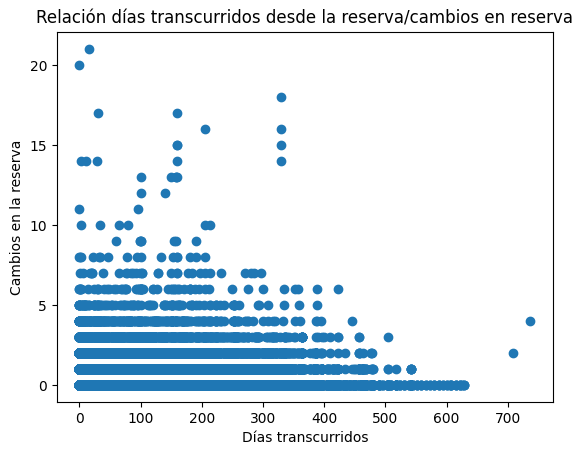

In [ ]:
fig, ax = plt.subplots()
ax.scatter(dfn ['Días transcurridos'], dfn['Número de cambios en la reserva'])
ax.set_title('Relación días transcurridos desde la reserva/cambios en reserva')
ax.set_xlabel('Días transcurridos')
ax.set_ylabel('Cambios en la reserva')

Observamos que a medida que más días transcurren desde que se realizó la reserva menos son los cambios que solicitan los clientes.

<Axes: >

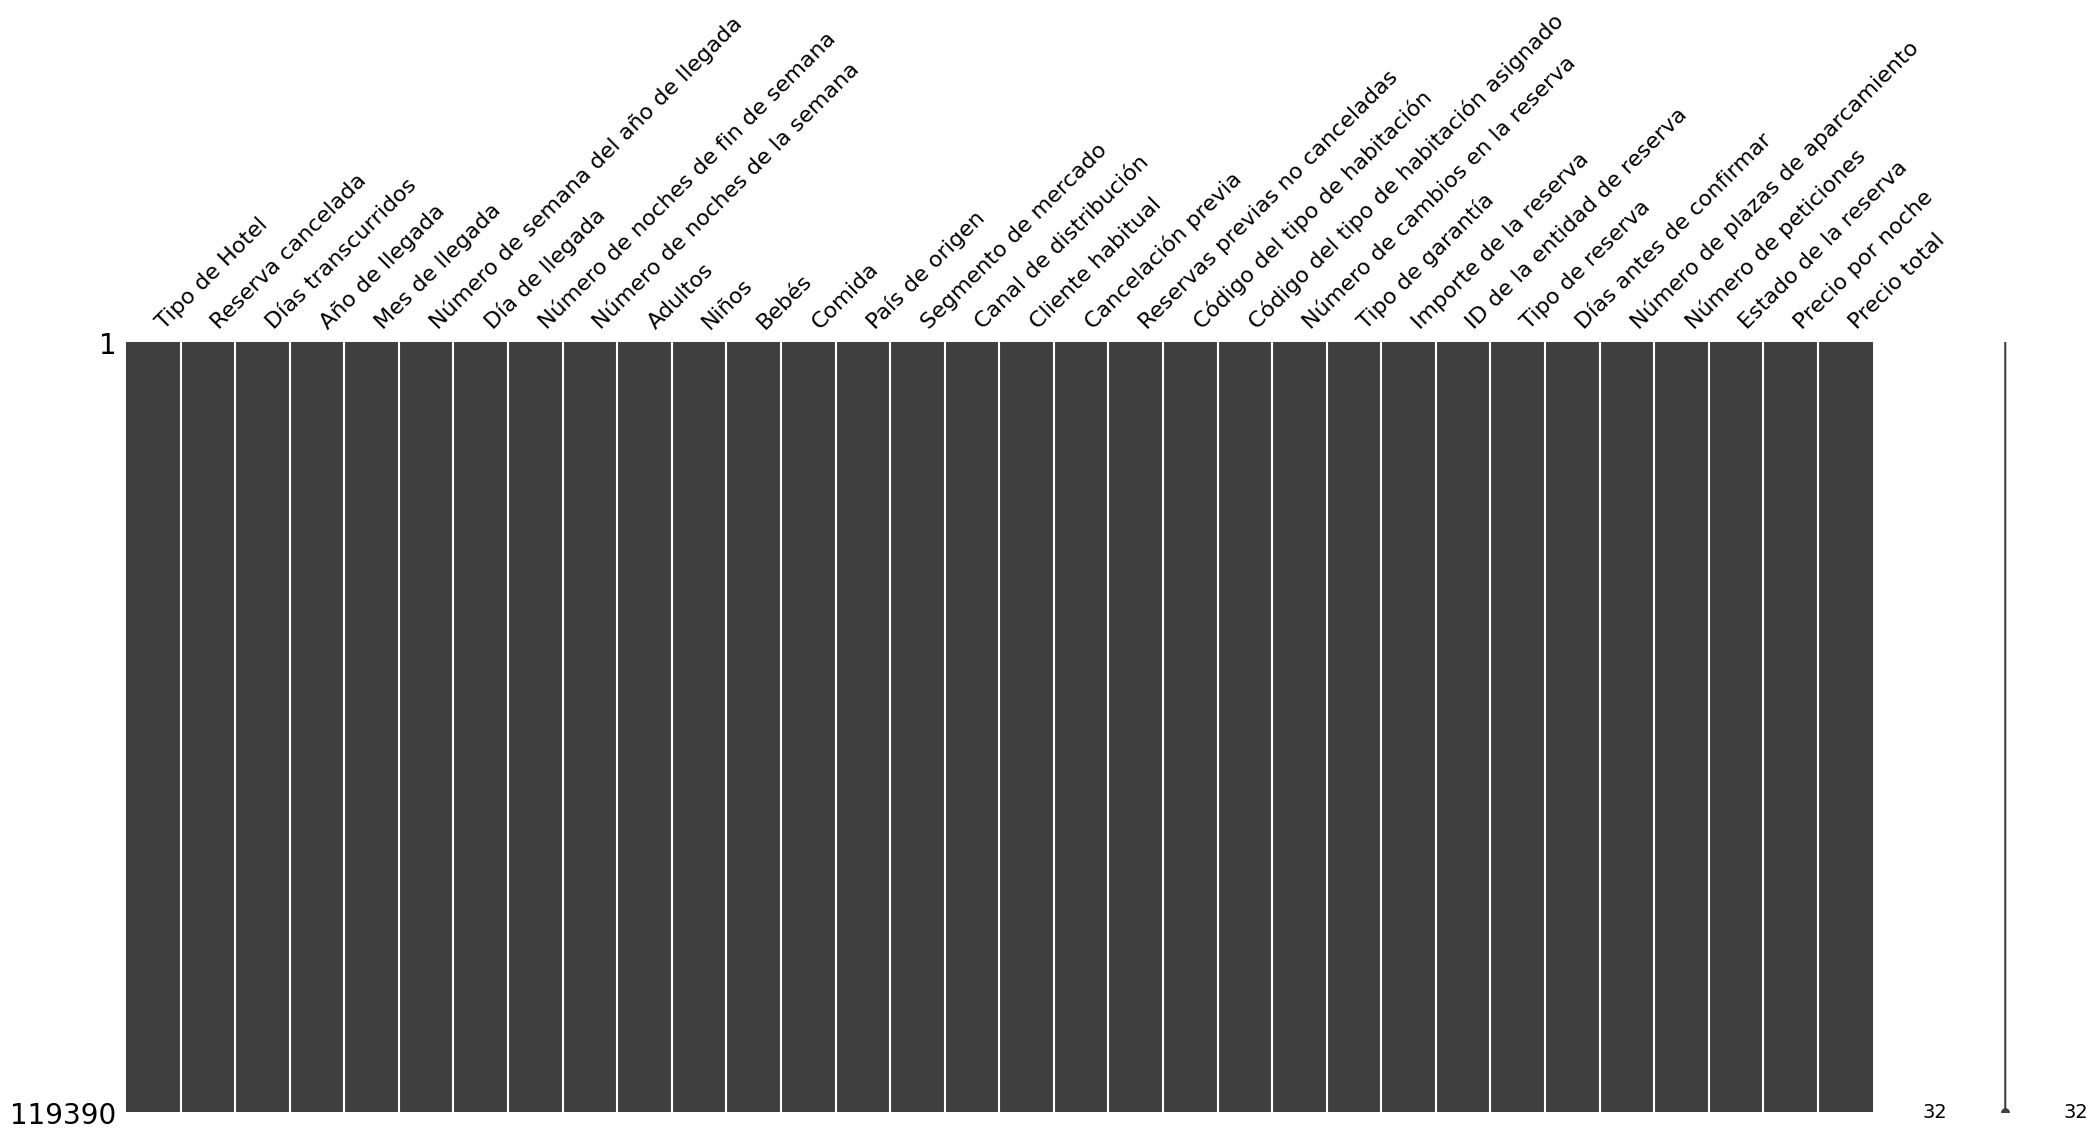

In [ ]:
msno.matrix(df)

Text(0.5, 0, 'Tipo de Hotel')

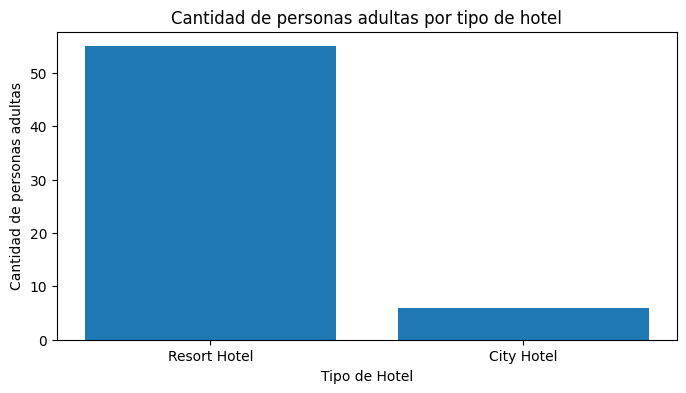

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(dfn['Tipo de Hotel'], dfn['Adultos'])
ax.set_title('Cantidad de personas adultas por tipo de hotel')
ax.set_ylabel('Cantidad de personas adultas')
ax.set_xlabel('Tipo de Hotel')

Aquí obrservamos que hay mayor prefeencia de personas adultas por los hoteles Resorts que hoteles en la Ciudad.

Text(0, 0.5, 'Cantidad de cancelaciones previas')

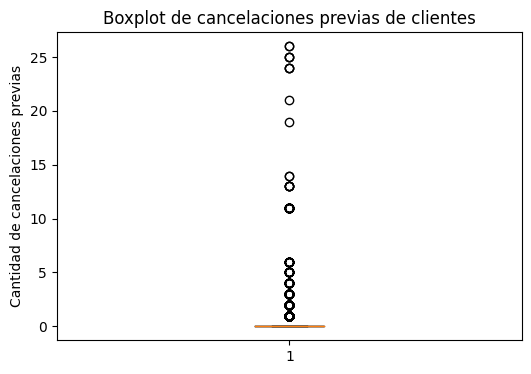

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(dfn['Cancelación previa'].T)
ax.set_title('Boxplot de cancelaciones previas de clientes')
ax.set_ylabel('Cantidad de cancelaciones previas')


Con este gráfico podemos demostrar que no es típico que los clientes cancelen sus reservas, aunque con valores outliers vemos que sí sucede.

Text(0, 0.5, 'Importe de la reserva')

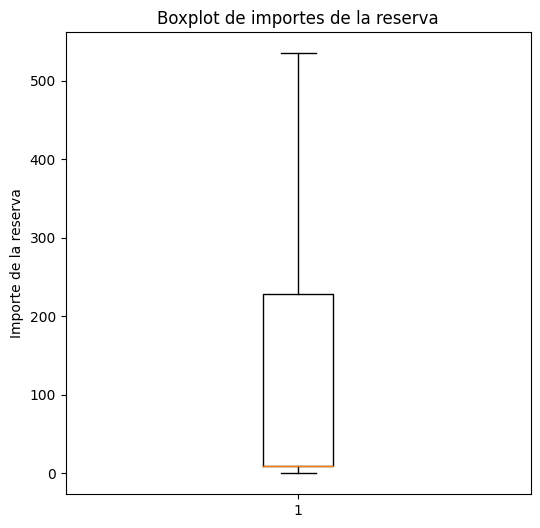

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(dfn['Importe de la reserva'].T)
ax.set_title('Boxplot de importes de la reserva')
ax.set_ylabel('Importe de la reserva')

Vemos los importes habituales con los que se realizan las reservan y los valores atípicos (outliers).

<Axes: xlabel='Tipo de reserva', ylabel='Count'>

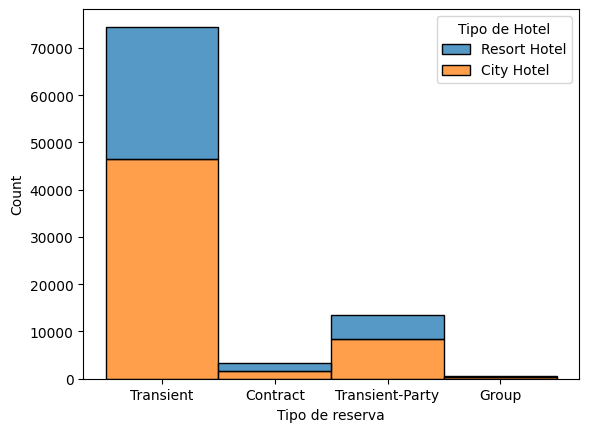

In [ ]:
sns.histplot(data=dfn, x="Tipo de reserva", hue="Tipo de Hotel", multiple="stack")

Vemos la distribución de las cantidades de tipo de reservas por tipo de hotel.

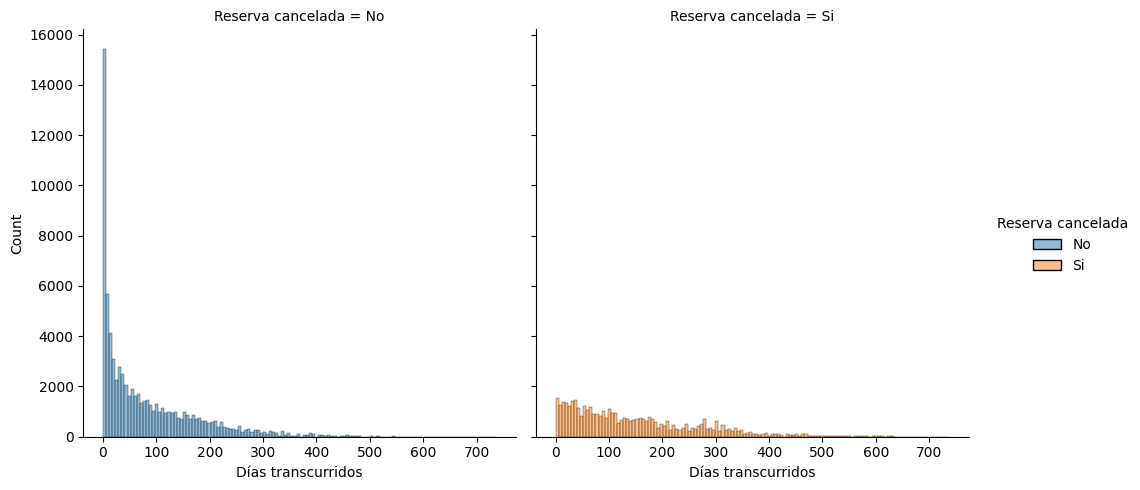

In [ ]:
sns.displot(data=df, x="Días transcurridos", hue="Reserva cancelada", col="Reserva cancelada")

Observamos que, dentro de las cancelaciones (parte derecha del gráfico), mientras más días pasan desde que los clientes realizan la reserva de hospedaje, es menos probable que cancelen la misma.

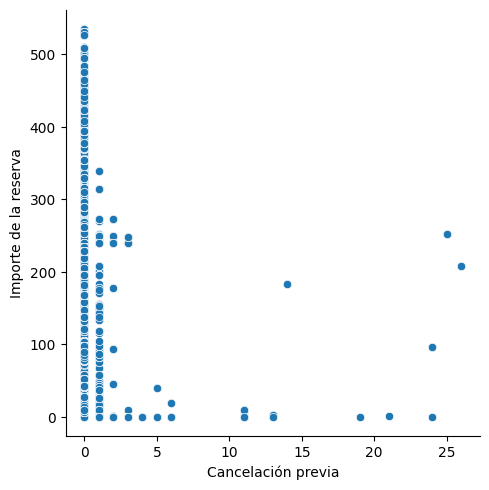

In [ ]:
g = sns.relplot(data=dfn, x="Cancelación previa", y="Importe de la reserva")

Podemos apreciar que la mayoría de los clientes no tienen cancelaciones previas y otorgan mayores importes de reserva.

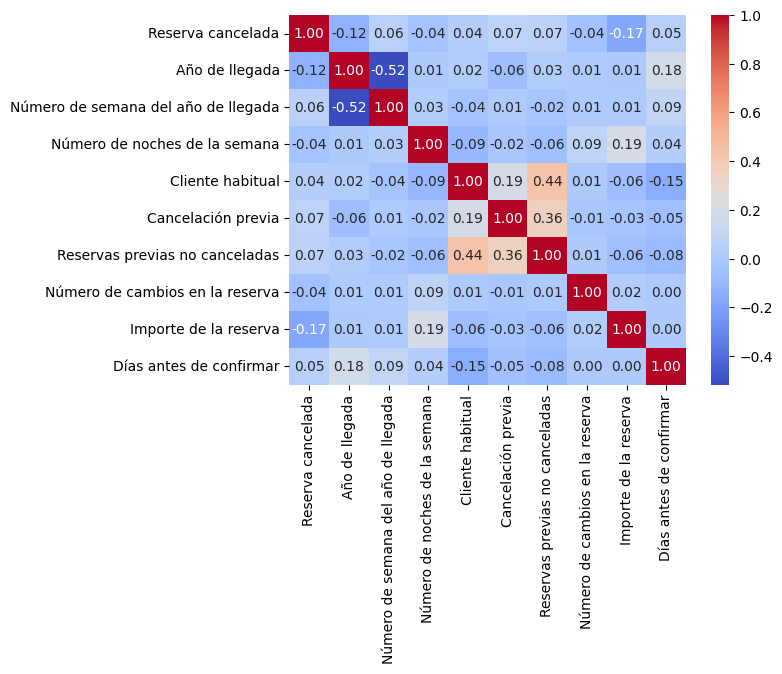

In [ ]:
g = sns.heatmap(data=dfn[["Reserva cancelada","Año de llegada","Número de semana del año de llegada",
                          "Número de noches de la semana","Cliente habitual","Cancelación previa",
                          "Reservas previas no canceladas","Número de cambios en la reserva","Importe de la reserva",
                          "Días antes de confirmar"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## MODELADO

In [ ]:
# Split data for Classification (Reserva cancelada)

# Classification task: Predicting 'Reserva cancelada'
X_classification = dfn[['Año de llegada','Número de semana del año de llegada','Cancelación previa',
                        'Reservas previas no canceladas','Importe de la reserva']]
y_classification = dfn['Reserva cancelada']


# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


In [ ]:
# Classification Models (Reserva cancelada Prediction)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf, y_train_clf)
y_pred_logreg = logreg.predict(X_test_clf)
print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_logreg))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)
print("Random Forest Accuracy:", accuracy_score(y_test_clf, y_pred_rf))

# SVC
svc = SVC()
svc.fit(X_train_clf, y_train_clf)
y_pred_svc = svc.predict(X_test_clf)
print("SVC Accuracy:", accuracy_score(y_test_clf, y_pred_svc))

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_clf, y_train_clf)
y_pred_gb = gb_clf.predict(X_test_clf)
print("Gradient Boosting Accuracy:", accuracy_score(y_test_clf, y_pred_gb))

# Classification Report for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test_clf, y_pred_logreg))


Logistic Regression Accuracy: 0.5693144722524484
Random Forest Accuracy: 0.7038628944504897
SVC Accuracy: 0.5702393906420021
Gradient Boosting Accuracy: 0.6617519042437432
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      9517
           1       0.55      0.58      0.57      8863

    accuracy                           0.57     18380
   macro avg       0.57      0.57      0.57     18380
weighted avg       0.57      0.57      0.57     18380



In [ ]:
# Classification Report for each model
print("Classification Report for Random Forest:")
print(classification_report(y_test_clf, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      9517
           1       0.70      0.67      0.68      8863

    accuracy                           0.70     18380
   macro avg       0.70      0.70      0.70     18380
weighted avg       0.70      0.70      0.70     18380



In [ ]:
# Classification Report for each model
print("Classification Report for SVC:")
print(classification_report(y_test_clf, y_pred_svc))

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.65      0.37      0.47      9517
           1       0.54      0.78      0.64      8863

    accuracy                           0.57     18380
   macro avg       0.59      0.58      0.56     18380
weighted avg       0.59      0.57      0.55     18380



In [ ]:
# Classification Report for each model
print("Classification Report for Boosting Classifier:")
print(classification_report(y_test_clf, y_pred_gb))

Classification Report for Boosting Classifier:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      9517
           1       0.66      0.62      0.64      8863

    accuracy                           0.66     18380
   macro avg       0.66      0.66      0.66     18380
weighted avg       0.66      0.66      0.66     18380



In [ ]:
class BaseModel:
    """Clase base con funcionalidad común para modelos de clasificación y regresión"""
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.models = {}
        self.best_model = None
        self.model_scores = {}

    def save_model(self, filename):
        """Guarda un modelo en disco"""
        if self.best_model:
            with open(filename, 'wb') as f:
                pickle.dump(self.best_model, f)
            print(f"Modelo guardado como {filename}")

    @staticmethod
    def load_model(filename):
        """Carga un modelo desde disco"""
        with open(filename, 'rb') as f:
            return pickle.load(f)
    def save_best_model(self, filepath, save_scaler=True, model_info=True):
        """
        Guarda el mejor modelo junto con información relevante y el scaler si existe.

        Parameters:
        -----------
        filepath : str
            Ruta base donde se guardará el modelo (sin extensión)
        save_scaler : bool, default=True
            Si es True, guarda el scaler junto con el modelo (si existe)
        model_info : bool, default=True
            Si es True, guarda un archivo JSON con información sobre el modelo

        Returns:
        --------
        dict
            Diccionario con las rutas de los archivos guardados
        """
        import os
        import joblib
        import json
        from datetime import datetime

        saved_files = {}

        try:
            # Crear el directorio si no existe
            os.makedirs(os.path.dirname(filepath), exist_ok=True)

            # Guardar el modelo
            model_path = f"{filepath}_model.joblib"
            joblib.dump(self.best_model, model_path)
            saved_files['model'] = model_path

            # Guardar el scaler si existe y se solicita
            if save_scaler and hasattr(self, 'scaler'):
                scaler_path = f"{filepath}_scaler.joblib"
                joblib.dump(self.scaler, scaler_path)
                saved_files['scaler'] = scaler_path

            # Guardar información del modelo
            if model_info:
                info = {
                    'model_type': type(self.best_model).__name__,
                    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'feature_names': list(self.X_train.columns) if hasattr(self.X_train, 'columns') else None,
                    'parameters': self.best_model.get_params(),
                }

                # Agregar métricas específicas según el tipo de modelo
                if isinstance(self, RegressionModel):
                    best_scores = min(self.model_scores.items(), key=lambda x: x[1]['mse'])
                    info['metrics'] = {
                        'mse': best_scores[1]['mse'],
                        'mae': best_scores[1]['mae'],
                        'r2': best_scores[1]['r2']
                    }
                else:  # ClassificationModel
                    best_scores = max(self.model_scores.items(), key=lambda x: x[1]['accuracy'])
                    info['metrics'] = {
                        'accuracy': best_scores[1]['accuracy'],
                        'classification_report': best_scores[1]['classification_report']
                    }

                info_path = f"{filepath}_info.json"
                with open(info_path, 'w', encoding='utf-8') as f:
                    json.dump(info, f, indent=4)
                saved_files['info'] = info_path

            print(f"Modelo guardado exitosamente en: {model_path}")
            return saved_files

        except Exception as e:
            print(f"Error al guardar el modelo: {str(e)}")
            return None

In [ ]:
class ClassificationModel(BaseModel):
    def __init__(self, X_train, y_train, X_test, y_test):
        super().__init__(X_train, y_train, X_test, y_test)

    def train_models(self, custom_models=None):
        """Entrena múltiples modelos de clasificación con búsqueda de hiperparámetros"""
        default_classifiers = {
            'RandomForest': (RandomForestClassifier(), {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }),
            'LogisticRegression': (LogisticRegression(max_iter=1000), {
                'C': [0.001, 0.01, 0.1, 1, 10],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga']
            }),
            'GradientBoosting': (GradientBoostingClassifier(), {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.3],
                'max_depth': [3, 5, 7]
            }),
            #'SVC': (SVC(), {
            #    'C': [0.1, 1, 10],
            #    'kernel': ['rbf', 'linear'],
            #    'gamma': ['scale', 'auto']
            #}),
            'KNN': (KNeighborsClassifier(), {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            })
        }

        # Permite agregar modelos personalizados
        if custom_models:
            default_classifiers.update(custom_models)

        for name, (clf, param_grid) in default_classifiers.items():
            try:
                print(f"\nEntrenando {name}...")
                search = HalvingGridSearchCV(
                    clf,
                    param_grid,
                    factor=3,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1
                )
                search.fit(self.X_train, self.y_train)
                self.models[name] = search.best_estimator_
                print(f"{name} - Mejores parámetros: {search.best_params_}")
                print(f"{name} - Mejor score CV: {search.best_score_:.4f}")
            except Exception as e:
                print(f"Error entrenando {name}: {str(e)}")

    def evaluate_models(self):
        """Evalúa todos los modelos entrenados y guarda sus métricas"""
        best_score = 0
        evaluation_results = []

        for name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                accuracy = accuracy_score(self.y_test, y_pred)
                self.model_scores[name] = {
                    'accuracy': accuracy,
                    'classification_report': classification_report(self.y_test, y_pred),
                    'confusion_matrix': confusion_matrix(self.y_test, y_pred)
                }

                evaluation_results.append({
                    'Model': name,
                    'Accuracy': accuracy
                })

                if accuracy > best_score:
                    self.best_model = model
                    best_score = accuracy

                print(f"\nResultados para {name}:")
                print(f"Accuracy: {accuracy:.4f}")
                print("Classification Report:")
                print(self.model_scores[name]['classification_report'])

            except Exception as e:
                print(f"Error evaluando {name}: {str(e)}")

        # Crear DataFrame con resultados
        results_df = pd.DataFrame(evaluation_results)
        print("\nResumen de resultados:")
        print(results_df.sort_values('Accuracy', ascending=False))
        print(f"\nMejor modelo: {type(self.best_model).__name__} con accuracy: {best_score:.4f}")
        return results_df

In [ ]:
class RegressionModel(BaseModel):
    def __init__(self, X_train, y_train, X_test, y_test):
        super().__init__(X_train, y_train, X_test, y_test)

    def train_models(self, custom_models=None):
        """Entrena múltiples modelos de regresión con búsqueda de hiperparámetros"""
        default_regressors = {
            'RandomForest': (RandomForestRegressor(), {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }),
            'LinearRegression': (LinearRegression(), {}),
            'Ridge': (Ridge(), {
                'alpha': [0.1, 1.0, 10.0],
                'solver': ['auto', 'svd', 'cholesky']
            }),
            'Lasso': (Lasso(), {
                'alpha': [0.1, 1.0, 10.0],
                'selection': ['cyclic', 'random']
            }),
            'ElasticNet': (ElasticNet(), {
                'alpha': [0.1, 1.0, 10.0],
                'l1_ratio': [0.2, 0.5, 0.8]
            }),
            'SVR': (SVR(), {
                'C': [0.1, 1, 10],
                'kernel': ['rbf', 'linear'],
                'gamma': ['scale', 'auto']
            }),
            'GradientBoosting': (GradientBoostingRegressor(), {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.3],
                'max_depth': [3, 5, 7]
            }),
            'KNN': (KNeighborsRegressor(), {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            })
        }

        # Permite agregar modelos personalizados
        if custom_models:
            default_regressors.update(custom_models)

        for name, (reg, param_grid) in default_regressors.items():
            try:
                print(f"\nEntrenando {name}...")
                search = RandomizedSearchCV(
                    reg,
                    param_grid,
                    n_iter=10,
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1
                )
                search.fit(self.X_train, self.y_train)
                self.models[name] = search.best_estimator_
                print(f"{name} - Mejores parámetros: {search.best_params_}")
                print(f"{name} - Mejor score CV: {-search.best_score_:.4f}")
            except Exception as e:
                print(f"Error entrenando {name}: {str(e)}")

    def evaluate_models(self):
        """Evalúa todos los modelos entrenados y guarda sus métricas"""
        best_score = float('inf')
        evaluation_results = []

        for name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                mse = mean_squared_error(self.y_test, y_pred)
                mae = mean_absolute_error(self.y_test, y_pred)
                r2 = r2_score(self.y_test, y_pred)

                self.model_scores[name] = {
                    'mse': mse,
                    'mae': mae,
                    'r2': r2
                }

                evaluation_results.append({
                    'Model': name,
                    'MSE': mse,
                    'MAE': mae,
                    'R2': r2
                })

                if mse < best_score:
                    self.best_model = model
                    best_score = mse

                print(f"\nResultados para {name}:")
                print(f"MSE: {mse:.4f}")
                print(f"MAE: {mae:.4f}")
                print(f"R2: {r2:.4f}")

            except Exception as e:
                print(f"Error evaluando {name}: {str(e)}")

        # Crear DataFrame con resultados
        results_df = pd.DataFrame(evaluation_results)
        print("\nResumen de resultados:")
        print(results_df.sort_values('MSE'))
        print(f"\nMejor modelo: {type(self.best_model).__name__} con MSE: {best_score:.4f}")
        return results_df

In [ ]:
class ModelPerformanceVisualizer:
    def __init__(self, classification_model=None, regression_model=None):
        self.classification_model = classification_model
        self.regression_model = regression_model

    def plot_classification_results(self):
        """Visualiza los resultados de los modelos de clasificación"""
        if not self.classification_model or not self.classification_model.model_scores:
            print("No hay resultados de clasificación para visualizar")
            return

        # Gráfico de barras de accuracy
        plt.figure(figsize=(12, 6))
        accuracies = {name: scores['accuracy']
                     for name, scores in self.classification_model.model_scores.items()}
        plt.bar(accuracies.keys(), accuracies.values())
        plt.title('Comparación de Accuracy entre Modelos')
        plt.xticks(rotation=45)
        plt.ylabel('Accuracy')
        plt.tight_layout()
        plt.show()

        # Matriz de confusión del mejor modelo
        best_model_name = max(accuracies, key=accuracies.get)
        cm = self.classification_model.model_scores[best_model_name]['confusion_matrix']
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión - {best_model_name}')
        plt.ylabel('Real')
        plt.xlabel('Predicho')
        plt.tight_layout()
        plt.show()

    def plot_regression_results(self):
        """Visualiza los resultados de los modelos de regresión"""
        if not self.regression_model or not self.regression_model.model_scores:
            print("No hay resultados de regresión para visualizar")
            return

        # Gráfico de métricas múltiples
        metrics = {'MSE': [], 'MAE': [], 'R2': []}
        models = []

        for name, scores in self.regression_model.model_scores.items():
            models.append(name)
            metrics['MSE'].append(scores['mse'])
            metrics['MAE'].append(scores['mae'])
            metrics['R2'].append(scores['r2'])

        # Crear subplots para cada métrica
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        for i, (metric, values) in enumerate(metrics.items()):
            axes[i].bar(models, values)
            axes[i].set_title(f'{metric} por Modelo')
            axes[i].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()
        # Scatter plot de valores reales vs predichos para el mejor modelo
        best_model_name = min(self.regression_model.model_scores,
                            key=lambda x: self.regression_model.model_scores[x]['mse'])
        y_pred = self.regression_model.models[best_model_name].predict(self.regression_model.X_test)

        plt.figure(figsize=(10, 6))
        plt.scatter(self.regression_model.y_test, y_pred, alpha=0.5)
        plt.plot([self.regression_model.y_test.min(), self.regression_model.y_test.max()],
                [self.regression_model.y_test.min(), self.regression_model.y_test.max()],
                'r--', lw=2)
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.title(f'Valores Reales vs Predichos - {best_model_name}')
        plt.tight_layout()
        plt.show()

    def generate_summary_report(self):
        """Genera un reporte resumen de todos los modelos evaluados"""
        report = []

        if self.classification_model and self.classification_model.model_scores:
            report.append("=== Resultados de Clasificación ===")
            # Ordenar modelos por accuracy
            sorted_models = sorted(
                self.classification_model.model_scores.items(),
                key=lambda x: x[1]['accuracy'],
                reverse=True
            )

            for name, scores in sorted_models:
                report.append(f"\nModelo: {name}")
                report.append(f"Accuracy: {scores['accuracy']:.4f}")
                report.append("\nReporte de Clasificación:")
                report.append(scores['classification_report'])

        if self.regression_model and self.regression_model.model_scores:
            report.append("\n=== Resultados de Regresión ===")
            # Ordenar modelos por MSE
            sorted_models = sorted(
                self.regression_model.model_scores.items(),
                key=lambda x: x[1]['mse']
            )

            for name, scores in sorted_models:
                report.append(f"\nModelo: {name}")
                report.append(f"MSE: {scores['mse']:.4f}")
                report.append(f"MAE: {scores['mae']:.4f}")
                report.append(f"R2: {scores['r2']:.4f}")

        return "\n".join(report)

    def save_visualizations(self, output_dir='model_visualizations'):
        """Guarda todas las visualizaciones en un directorio específico"""
        import os

        # Crear directorio si no existe
        os.makedirs(output_dir, exist_ok=True)

        if self.classification_model and self.classification_model.model_scores:
            # Gráfico de accuracies
            plt.figure(figsize=(12, 6))
            accuracies = {name: scores['accuracy']
                         for name, scores in self.classification_model.model_scores.items()}
            plt.bar(accuracies.keys(), accuracies.values())
            plt.title('Comparación de Accuracy entre Modelos')
            plt.xticks(rotation=45)
            plt.ylabel('Accuracy')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, 'classification_accuracy_comparison.png'))
            plt.close()

            # Matriz de confusión del mejor modelo
            best_model_name = max(accuracies, key=accuracies.get)
            cm = self.classification_model.model_scores[best_model_name]['confusion_matrix']
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Matriz de Confusión - {best_model_name}')
            plt.ylabel('Real')
            plt.xlabel('Predicho')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, 'best_model_confusion_matrix.png'))
            plt.close()

        if self.regression_model and self.regression_model.model_scores:
            # Gráficos de métricas de regresión
            metrics = {'MSE': [], 'MAE': [], 'R2': []}
            models = []

            for name, scores in self.regression_model.model_scores.items():
                models.append(name)
                metrics['MSE'].append(scores['mse'])
                metrics['MAE'].append(scores['mae'])
                metrics['R2'].append(scores['r2'])

            for metric_name, values in metrics.items():
                plt.figure(figsize=(12, 6))
                plt.bar(models, values)
                plt.title(f'{metric_name} por Modelo')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig(os.path.join(output_dir, f'regression_{metric_name.lower()}_comparison.png'))
                plt.close()

            # Scatter plot de valores reales vs predichos
            best_model_name = min(self.regression_model.model_scores,
                                key=lambda x: self.regression_model.model_scores[x]['mse'])
            y_pred = self.regression_model.models[best_model_name].predict(self.regression_model.X_test)

            plt.figure(figsize=(10, 6))
            plt.scatter(self.regression_model.y_test, y_pred, alpha=0.5)
            plt.plot([self.regression_model.y_test.min(), self.regression_model.y_test.max()],
                    [self.regression_model.y_test.min(), self.regression_model.y_test.max()],
                    'r--', lw=2)
            plt.xlabel('Valores Reales')
            plt.ylabel('Predicciones')
            plt.title(f'Valores Reales vs Predichos - {best_model_name}')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, 'regression_predictions_scatter.png'))
            plt.close()


Entrenando RandomForest...
RandomForest - Mejores parámetros: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
RandomForest - Mejor score CV: 0.6929

Entrenando LogisticRegression...
LogisticRegression - Mejores parámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression - Mejor score CV: 0.5679

Entrenando GradientBoosting...
GradientBoosting - Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
GradientBoosting - Mejor score CV: 0.6961

Entrenando KNN...
KNN - Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
KNN - Mejor score CV: 0.6829

Resultados para RandomForest:
Accuracy: 0.6925
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      9517
           1       0.69      0.67      0.68      8863

    accuracy                           0.69     18380
   macro avg       0.69      0.69      0.69     18380
weighted av

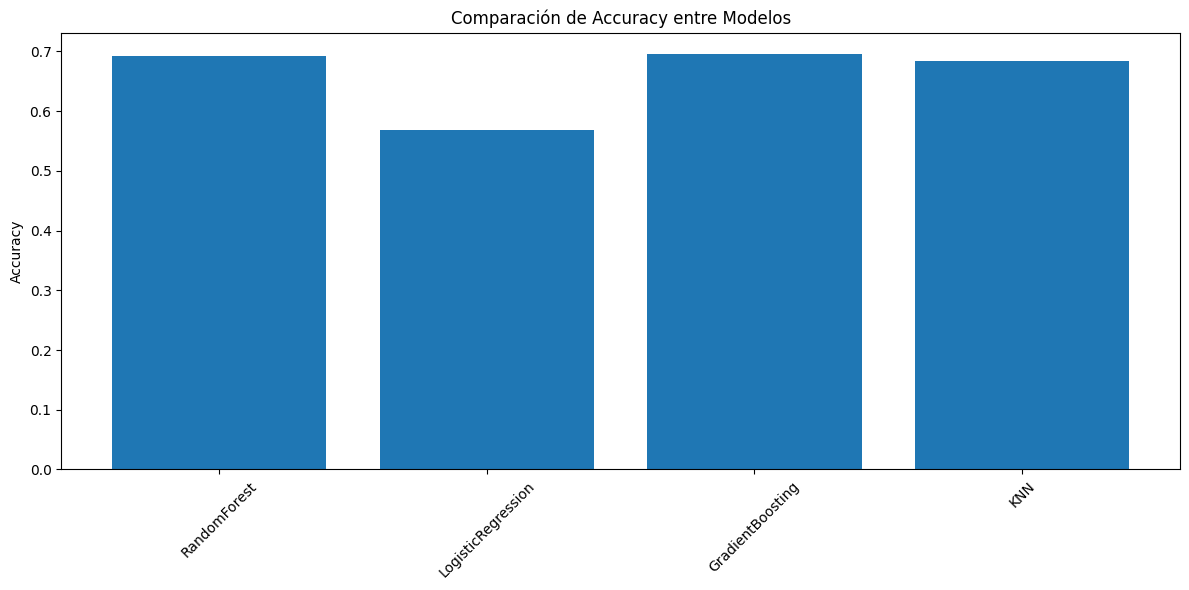

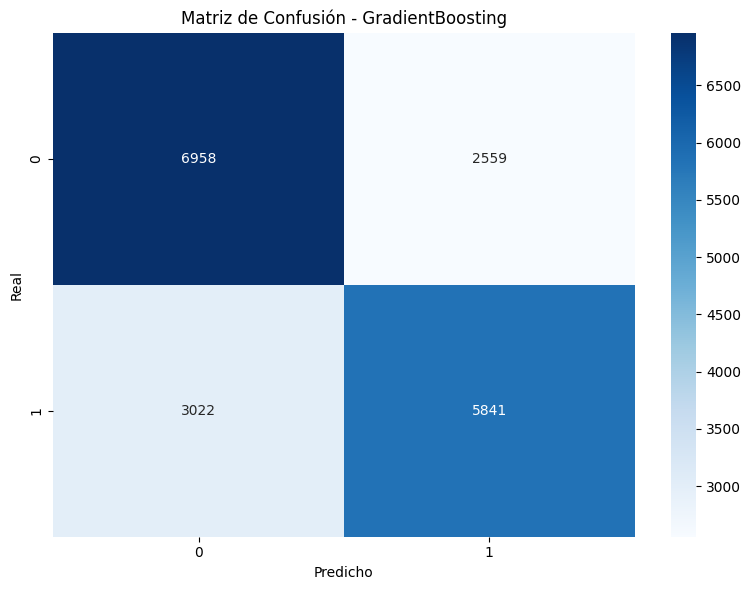

=== Resultados de Clasificación ===

Modelo: GradientBoosting
Accuracy: 0.6964

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      9517
           1       0.70      0.66      0.68      8863

    accuracy                           0.70     18380
   macro avg       0.70      0.70      0.70     18380
weighted avg       0.70      0.70      0.70     18380


Modelo: RandomForest
Accuracy: 0.6925

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      9517
           1       0.69      0.67      0.68      8863

    accuracy                           0.69     18380
   macro avg       0.69      0.69      0.69     18380
weighted avg       0.69      0.69      0.69     18380


Modelo: KNN
Accuracy: 0.6840

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      9517
        

In [ ]:
%%time
# Entrenar modelos de clasificación
clf = ClassificationModel(X_train_clf, y_train_clf, X_test_clf, y_test_clf)
clf.train_models()
clf_results = clf.evaluate_models()

# Visualizar resultados
visualizer = ModelPerformanceVisualizer(classification_model=clf)
visualizer.plot_classification_results()
visualizer.save_visualizations()

# Generar reporte
print(visualizer.generate_summary_report())

## CALCULO DE METRICAS DEL MEJOR MODELO

In [ ]:
y_pred_clf = clf.best_model.predict(X_test_clf)  # Get predictions using the best model

cf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

specificity = cf_matrix[0, 0] / (cf_matrix[0, 0] + cf_matrix[0, 1])

print("Specificity:", specificity)

Specificity: 0.7311127456131133


In [ ]:
tasa_falsos_positivos = 2559 / (2559 + 6958)
print("Tasa de falsos positivos: ",tasa_falsos_positivos)

Tasa de falsos positivos:  0.2688872543868866


## Conclusión

-Precisión (Precision): La precisión del modelo es del 70%, lo que indica que el 70% de las reservas predichas como canceladas son realmente canceladas, mientras que el 30% son falsas alarmas.


-Sensibilidad (Recall): La sensibilidad del modelo es del 73%, lo que indica que el 73% de las reservas reales canceladas fueron correctamente identificadas por el modelo.


-Especificidad: La especificidad del modelo es del 73%, lo que indica que el 73% de las reservas reales no canceladas fueron correctamente identificadas por el modelo.


-Valor F1: El valor F1, que es la media armónica de la precisión y la sensibilidad, es del 64%. Esto proporciona una medida única de la precisión general del modelo, teniendo en cuenta tanto los falsos positivos como los falsos negativos.


-Tasa de falsos positivos: La tasa de falsos positivos del modelo es del 27%, lo que indica que el 27% de las reservas no canceladas fueron incorrectamente clasificadas como canceladas por el modelo.


En resumen, el modelo tiene un rendimiento moderado en la predicción de cancelaciones de reservas. Aunque la precisión y la especificidad son relativamente altas, la sensibilidad es un poco baja, lo que indica que el modelo podría pasar por alto algunas reservas reales canceladas. Esto sugiere que podría ser necesario ajustar o mejorar el modelo para mejorar su capacidad predictiva, especialmente en términos de sensibilidad.
